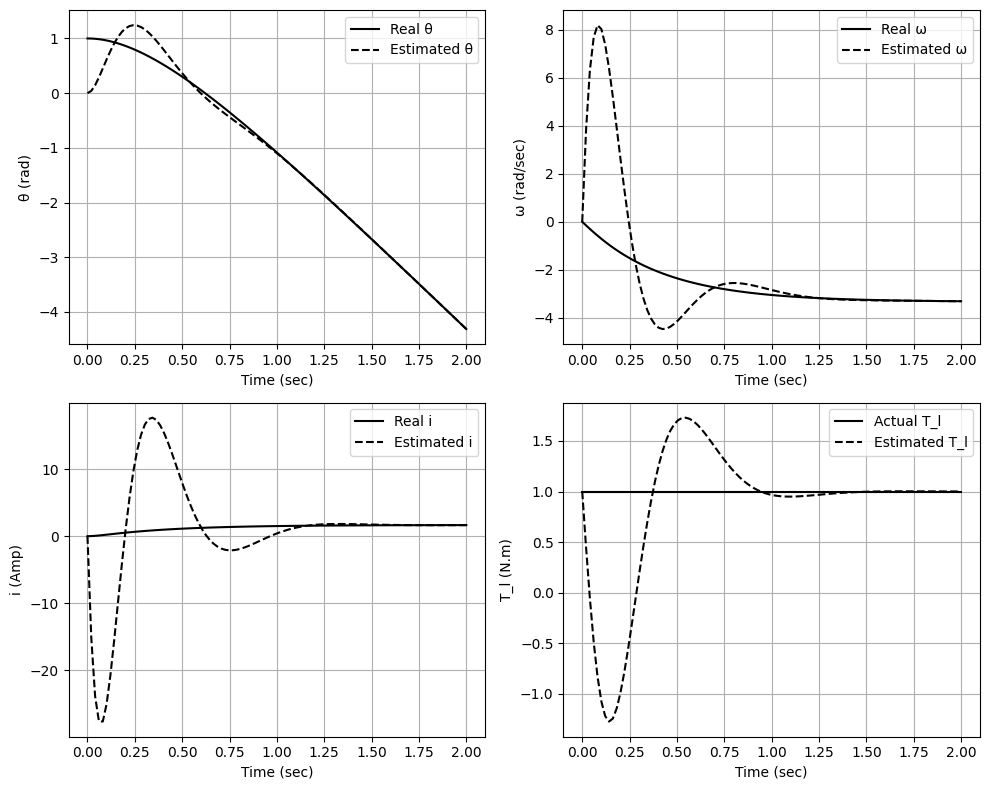

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the global parameter dictionary
Par = {
    'Tl': 1  # Step disturbance
}

def DC_motor_Obs(X, t, Par):
    # Extract state variables
    x = X[:3]
    xh = X[3:]

    # Define matrices
    A = np.array([
        [0, 1, 0],
        [0, 0, 4.438],
        [0, -12, -24]
    ])
    
    B = np.array([
        [0, 0],
        [0, -7.396],
        [20, 0]
    ])
    
    C = np.array([1, 0, 0])

    Ah = np.array([
        [0, 1, 0, 0],
        [0, 0, 4.438, -7.396],
        [0, -12, -24, 0],
        [0, 0, 0, 0]
    ])
    
    Bh = np.array([0, 0, 20, 0])
    Ch = np.array([1, 0, 0, 0])

    G = np.array([0, 234.7440, -936.9136, -27.6050])
    
    # Step disturbance
    Tl = Par['Tl']
    v = 0
    u = np.array([v, Tl])
    
    # Calculate the real system model
    xp = np.dot(A, x) + np.dot(B, u)
    y = np.dot(C, x)
    
    # Calculate the observer model
    xhp = np.dot(Ah, xh) + np.dot(Bh, v) + np.dot(G.reshape(-1, 1), (y - np.dot(Ch, xh)).reshape(1, -1)).flatten()
    
    # Augment the real and estimated states
    Xp = np.concatenate((xp, xhp))
    return Xp

# Simulation parameters
tspan = np.linspace(0, 2, 100)  # Time span for the simulation
x0 = [1, 0, 0, 0, 0, 0, Par['Tl']]  # Initial conditions

# Integrate the system of differential equations
X = odeint(DC_motor_Obs, x0, tspan, args=(Par,))

# Extract the real and estimated states
x_real = X[:, :3]
x_hat = X[:, 3:]

# Plotting
plt.figure(figsize=(10, 8))

plt.subplot(221)
plt.plot(tspan, x_real[:, 0], 'k', label='Real θ')
plt.plot(tspan, x_hat[:, 0], 'k--', label='Estimated θ')
plt.xlabel('Time (sec)')
plt.ylabel('θ (rad)')
plt.grid()
plt.legend()

plt.subplot(222)
plt.plot(tspan, x_real[:, 1], 'k', label='Real ω')
plt.plot(tspan, x_hat[:, 1], 'k--', label='Estimated ω')
plt.xlabel('Time (sec)')
plt.ylabel('ω (rad/sec)')
plt.grid()
plt.legend()

plt.subplot(223)
plt.plot(tspan, x_real[:, 2], 'k', label='Real i')
plt.plot(tspan, x_hat[:, 2], 'k--', label='Estimated i')
plt.xlabel('Time (sec)')
plt.ylabel('i (Amp)')
plt.grid()
plt.legend()

plt.subplot(224)
plt.plot(tspan, Par['Tl'] + np.zeros_like(tspan), 'k', label='Actual T_l')
plt.plot(tspan, x_hat[:, 3], 'k--', label='Estimated T_l')
plt.xlabel('Time (sec)')
plt.ylabel('T_l (N.m)')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()
